<a href="https://colab.research.google.com/github/raulbenitez/introAI_ICE/blob/main/Tema3_Reducci%C3%B3_de_dimensionalitat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 3: Tècniques de reducció de la dimensionalitat

3.1 Anàlisi de Components Principals

3.2 Visualització de dades d'alta dimensionalitat

3.3 Tècniques de selecció d'atributs

## 3.1 PRINCIPAL COMPONENT ANALYSIS (PCA)

Sovint, les dades experimentals presenten correlacions no negligibles entre les variables observades. L'objectiu és treballar en un espai de dimesionalitat reduïda que minimitzi les correlacions entre variables. 

Python implementation (sklearn):
https://scikit-learn.org/stable/modules/decomposition.html#pca




Transformació de coordenades lineals en què el nou eix correspon a les direccions en què les dades presenten més dispersió. El procediment és el següent:

- $A$: matriu de dades de mida $mxn$ (m observacions x n variables).
- Estandaritzar les dades (restar mitjana i escalar amb la desviació típica): $(A-\bar{A})/\sigma$.
- Obtenir la matriu de covariància $n \times n$ de les dades: $C = \frac{1}{n-1}(A-\bar{A})^T(A-\bar{A})$.
- Diagonalitzar C: $C \cdot \vec{v}_i = \lambda_i \vec{v}_i, i = 1,\dots,n$. Els vectors propis $\vec{v}_i$ corresponen a les coordenades de l'espai PCA. Els valors propis $\lambda_i$ corresponen a la variància de les dades originals explicades per cada component.
- La variància explicada pel component principal $\vec{v}_i$ és: $\frac{\lambda_i}{\sum_i^n\lambda_i}$
- Projecte de dades al nou espai PCA. Projecció en el component i: $P_i = A \cdot \vec{v}_i$


### PCA dades simples

Creem un conjunt de dades bidimensionals que només té 5 observacions per entendre millor el procediment i la geometria PCA:


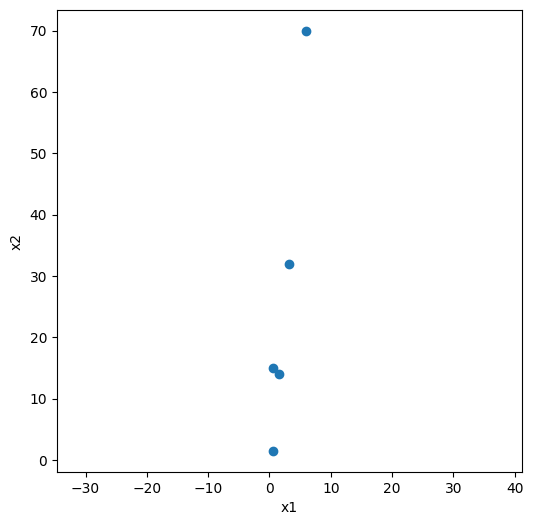

In [1]:
import numpy as np
import matplotlib.pylab as plt
D = np.array([[1.6,14],[3.2,32],[6,70],[0.5,1.5],[0.5,15]])

fig = plt.figure(figsize=(6,6))
plt.scatter(D[:,0],D[:,1])
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

In [2]:
D.shape

(5, 2)

Estandarditzem les dades 

In [3]:
DS = (D-D.mean(axis=0))/D.std(axis=0) # standardizing data

# it's equivalent to: 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler
DS1 = StandardScaler().fit_transform(D)

# check it:
print('Són equivalents: {}'.format((DS-DS1).sum()))

Són equivalents: 0.0


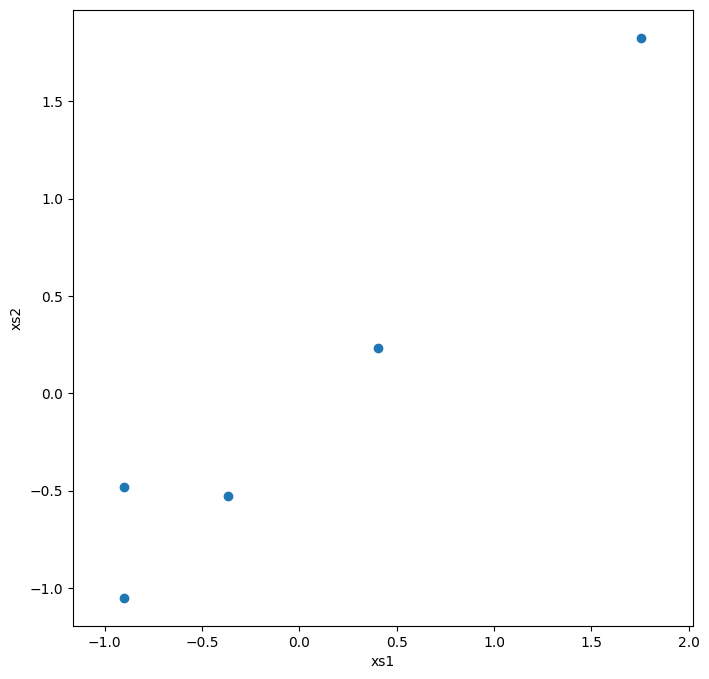

In [4]:
fig = plt.figure(figsize=(8,8))
plt.scatter(DS[:,0],DS[:,1])
plt.axis('equal')
plt.xlabel('xs1')
plt.ylabel('xs2')
plt.axis('equal')
plt.show()

Aplicar PCA a dades estandarditzades

In [5]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(DS)

In [6]:
100*pca.explained_variance_ratio_

array([98.72222616,  1.27777384])

Comproveu la variància explicada per cada component mirant els valors propis:

In [7]:
100*pca.explained_variance_ratio_.cumsum()

array([ 98.72222616, 100.        ])

In [8]:
pca.explained_variance_ # valors propis

array([2.46805565, 0.03194435])

El primer component PCA explica el 98% de la variabilitat de les dades. Visualitzem els components principals (vectors propis):

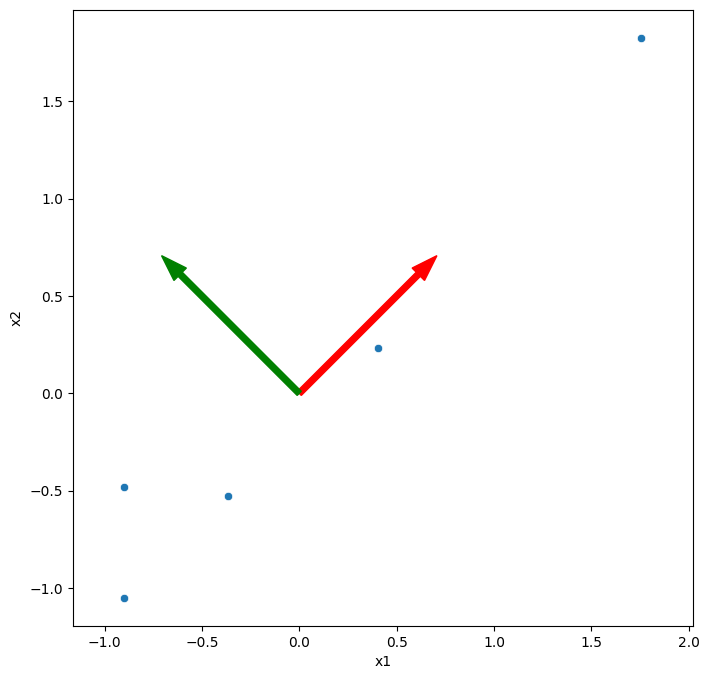

In [9]:
import pandas as pd
import seaborn as sns

vec = pca.components_ # eigenvectors

dfpcas = pd.DataFrame(DS[:,0:2],columns=['x1', 'x2'])

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x="x1", y="x2",data=dfpcas)
plt.arrow(0,0,vec[0][0],vec[0][1],shape='full',fc='r', ec='r', length_includes_head = True, width=0.03)
plt.arrow(0,0,vec[1][0],vec[1][1],shape='full',fc='g', ec='g', length_includes_head = True, width=0.03)
plt.axis('equal')
plt.show()


Comprovem que els vectors propis són ortogonals:


In [10]:
np.dot(vec[0],vec[1])

0.0

Dimensionality reduction: we project the original data to the first PCA axis

In [11]:
Xproj = pca.transform(DS)
XPCA = Xproj[:,0]
XPCA.shape
XPCA

array([-0.63057835,  0.45005542,  2.53415249, -1.37722537, -0.97640419])

In [13]:
XPCA.shape

(5,)

### PCA pas a pas amb numpy: 

In [14]:
M = np.cov(DS.T) # Sample covariance matrix: M = [(A-mean(A))'-(A-mean(A))] 
M.shape # should be nvariables x nvariables (in this example, 2x2)

(2, 2)

In [15]:
M

array([[1.25      , 1.21805565],
       [1.21805565, 1.25      ]])

Realitzeu la diagonalització de la matriu de covariància

In [16]:
eigval, eigvec = np.linalg.eig(M)

Comprovem els valors propis

In [17]:
print('Eigenvalues using sklearn {}'.format(pca.explained_variance_))
print('Eigenvalues using numpy {}'.format(eigval))

Eigenvalues using sklearn [2.46805565 0.03194435]
Eigenvalues using numpy [2.46805565 0.03194435]


Comproveu els vectors propis

In [18]:
print('Eigenvectors using sklearn {}'.format(pca.components_))
print('Eigenvectors using numpy {}'.format(eigvec))


Eigenvectors using sklearn [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Eigenvectors using numpy [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Comprovem la projecció

In [19]:
XPCA1 = np.dot(DS,eigvec)
XPCA1

array([[-0.63057835, -0.11168309],
       [ 0.45005542, -0.12346039],
       [ 2.53415249,  0.04891732],
       [-1.37722537, -0.10729751],
       [-0.97640419,  0.29352367]])

In [20]:
Xproj

array([[-0.63057835, -0.11168309],
       [ 0.45005542, -0.12346039],
       [ 2.53415249,  0.04891732],
       [-1.37722537, -0.10729751],
       [-0.97640419,  0.29352367]])

Què passa si les dades són colineals? 

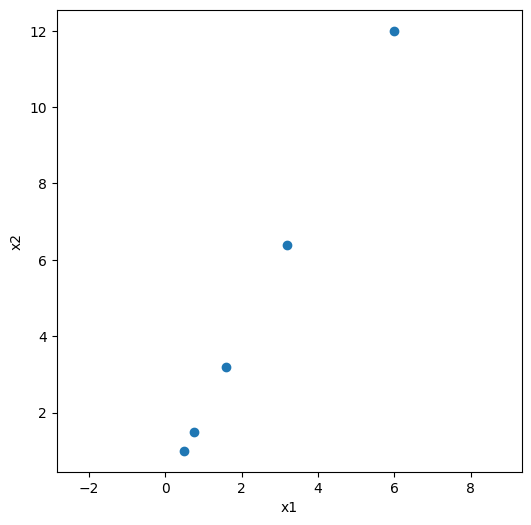

In [22]:
D = np.array([[1.6,3.2],[3.2,6.4],[6,12],[0.5,1],[0.75,1.5]])

fig = plt.figure(figsize=(6,6))
plt.scatter(D[:,0],D[:,1])
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

In [23]:
from sklearn import decomposition
DS1 = StandardScaler().fit_transform(D)
pca = decomposition.PCA(n_components=2).fit(DS1)

In [24]:
pca.explained_variance_ratio_

array([1.00000000e+00, 3.89808221e-32])

In [26]:
pca.get_covariance()

array([[1.25, 1.25],
       [1.25, 1.25]])

In [28]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [29]:
pca.explained_variance_

array([2.50000000e+00, 9.74520552e-32])

### PCA del dataset iris

carreguem el dataset:

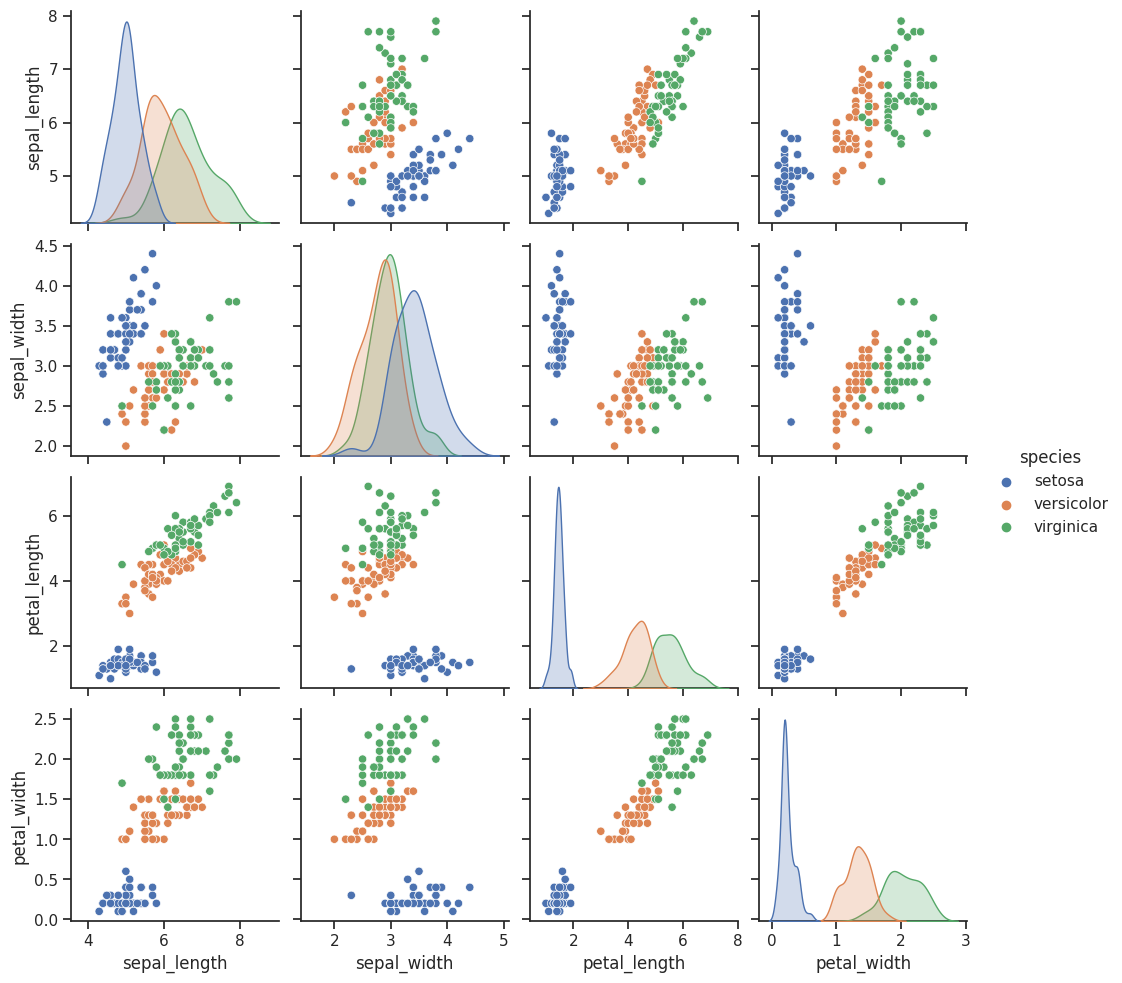

In [30]:
import seaborn as sns; 

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species")

In [31]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Split attributes and class labels:

In [32]:
X = iris[['sepal_length','sepal_width','petal_length','petal_width']] # features
y = iris['species'] # class labels

Scaling data

In [33]:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

In [34]:
XS.shape

(150, 4)

PCA to scaled data:

In [35]:
pca = decomposition.PCA(n_components=4).fit(XS)

In [37]:
pca.explained_variance_ratio_.cumsum()

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

Projection of data into the PCA space

In [38]:
Xproj = pca.transform(XS)
Xproj.shape

(150, 4)

Principal components and explained variance

In [39]:
print('eigenvalues = {} {} {} {}'.format(*pca.explained_variance_))
print('Explained variance = {} {} {} {}'.format(*pca.explained_variance_ratio_))

eigenvalues = 2.9380850501999953 0.9201649041624882 0.14774182104494799 0.02085386217646228
Explained variance = 0.7296244541329986 0.22850761786701781 0.03668921889282874 0.005178709107154798


Explained variance

In [40]:
100*pca.explained_variance_ratio_.cumsum()

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

Projecte les dades en un espai de dimensionalitat reduïda: projecció de les dades 4D originals a l'espai PCA 2D, ja que els dos components principals amb valors propis més grans capturen el 95,81% de la variància de les dades.

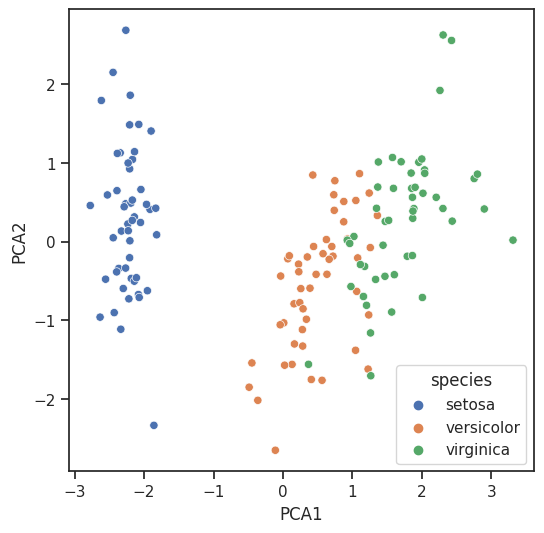

In [41]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

dfpca = pd.DataFrame(Xproj[:,0:2],columns=['PCA1', 'PCA2'])

fig = plt.figure(figsize=(6,6))

ax = sns.scatterplot(x="PCA1", y="PCA2", hue=y,data=dfpca)
plt.show()

In [42]:
Xproj[:,0:2].shape

(150, 2)

**Exercise**: Apply PCA to mpg dataset (cars)
- Apply PCA
- What proportion of the data variability explains each PCA component
- How many PCA components are necessary to explain 90% of the variability
- Project the data to the space of reduced dimensionality


In [ ]:
df_mpg = sns.load_dataset("mpg")
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


**Solució**

In [43]:
import pandas as pd 
import seaborn as sns
mpg = sns.load_dataset("mpg") # load dataset

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Comentario: como substituir valores 

In [44]:
np.unique(mpg['origin'].values)

array(['europe', 'japan', 'usa'], dtype=object)

In [45]:
mpg1 = mpg.replace({'europe':0, 'japan':1, 'usa':2})
mpg1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,2,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,2,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,2,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,2,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,2,ford torino


Eliminamos variables no nnuméricas

In [46]:
mpg_num = mpg.drop(['origin','name'],axis=1)
mpg_num.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [47]:
mpg_num1 = mpg.select_dtypes(include='number') # keep only numeric variables 
mpg_num1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


Cuantos NaNs hay? 

In [48]:
mpg_num.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Vemos que hay 6 NaN en la variable horsepower. Los podemos localizar con:

In [49]:
mpg_num.loc[mpg_num['horsepower'].isna()==True]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [51]:
mpg_num_nonans = mpg_num.dropna() # remove observations with NaNs

print('datos originales = {}'.format(mpg.shape))
print('datos numericos = {}'.format(mpg_num.shape))
print('datos numericos sin NaNs = {}'.format(mpg_num_nonans.shape))

datos originales = (398, 9)
datos numericos = (398, 7)
datos numericos sin NaNs = (392, 7)


In [52]:

X = mpg_num_nonans
y = mpg['origin'] # use origin as class label (not needed in PCA)

# scale data:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

# PCA decomopositon:
from sklearn import decomposition
n_variables = mpg_num.shape[1]
pca = decomposition.PCA(n_components=n_variables).fit(XS)

# varianza explicada acumulada:
print('varianza explicada acumulada ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

varianza explicada acumulada =[ 71.58051179  83.94610315  94.35172845  96.97908694  98.72074871
  99.49585101 100.        ]


Dimensionalidad datos en espacio PCA reducido = (392, 3)


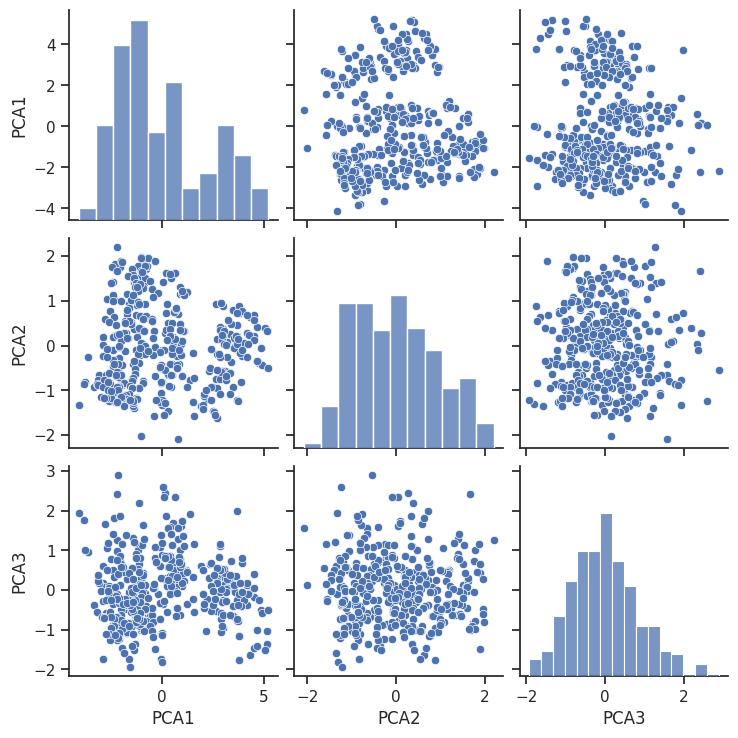

In [53]:
# project data into PCA space:
Xproj = pca.transform(XS)

# Reducir dimensionalidad de los datos quedandonos solamente con tres componentes PCA:
ndim_reducida = 3 # establecer dimensionalidad reducida a partir de la varianza explicada por cada componente
XPCA = Xproj[:,0:ndim_reducida]

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

d = pd.DataFrame(XPCA,columns=['PCA1', 'PCA2','PCA3'])
sns.pairplot(d)
plt.show()

### Perquè cal estandarditzar les dades a PCA?

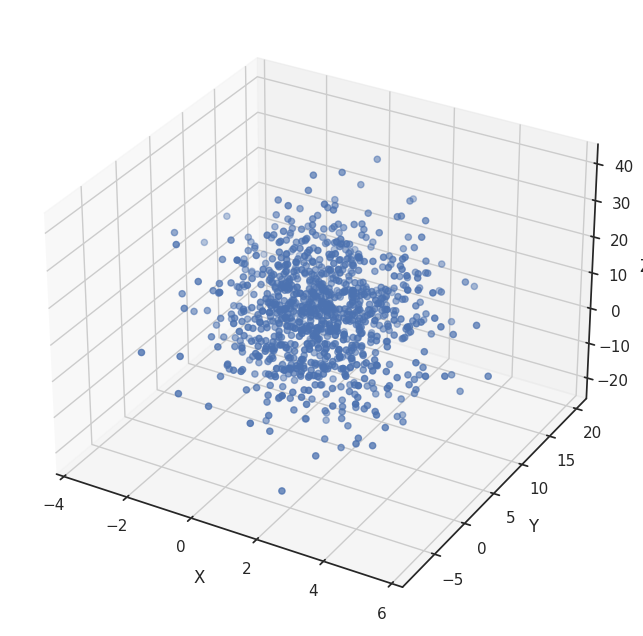

PCA without scaling: [0.834 0.152 0.014]
PCA with scaling: [0.372 0.332 0.296]


In [54]:
from numpy import *
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
set_printoptions(precision = 3)

# Generate multivariate gaussian observations (3D):
mean = [1,5,10]
cov = [[2,-1,0],[-1,20,-1],[0,-1,100]]
d = random.multivariate_normal(mean,cov,1000)

# ANALISIS PCA:
# Standardize data ( d1 = (d - d.mean(0))/d.std(0) ):
from sklearn import preprocessing
d1 = preprocessing.scale(d)

# representación gráfica de los datos:
fig = plot.figure(1,figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(d[:,0],d[:,1],d[:,2])
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')
plot.show()

import numpy as np
from sklearn.decomposition import PCA
pca1 = PCA(n_components=3)
pca1.fit(d)
X = pca1.transform(d)
print('PCA without scaling:',format(pca1.explained_variance_ratio_))

pca2 = PCA(n_components=3)
pca2.fit(d1)
X = pca2.transform(d1)
print('PCA with scaling:',format(pca2.explained_variance_ratio_))

Quan es realitza un PCA amb les dades no escalades, el primer component PCA explica una variabilitat de les dades del 74%. Això no és perquè les variables presentin correlacions que permeten reduir la dimensionalitat de les dades (la dispersió 3D mostra que estan clarament no correlacionades), sinó perquè les tres variables presenten rangs totalment diferents. És més sensat escalar les dades i veiem que el PCA de les dades escalades té tres components, cadascun d'ells representa aproximadament un terç de la variabilitat de les dades.

Si les dades no s'escalen, un dels components podria explicar gran part de la variació de les dades a causa de les diferències en els intervals de variables. Quan les dades tenen unitats o escales diferents, això és important a tenir en compte.

### PCA amb dades sintètiques

Aquest exemple mostra que la PCA permet reduir la dimensionalitat en els casos en què algunes de les variables (x3, x4) estan altament correlacionades amb altres (x1, x2).

array([5.383e+01, 4.617e+01, 3.947e-30, 2.695e-30])

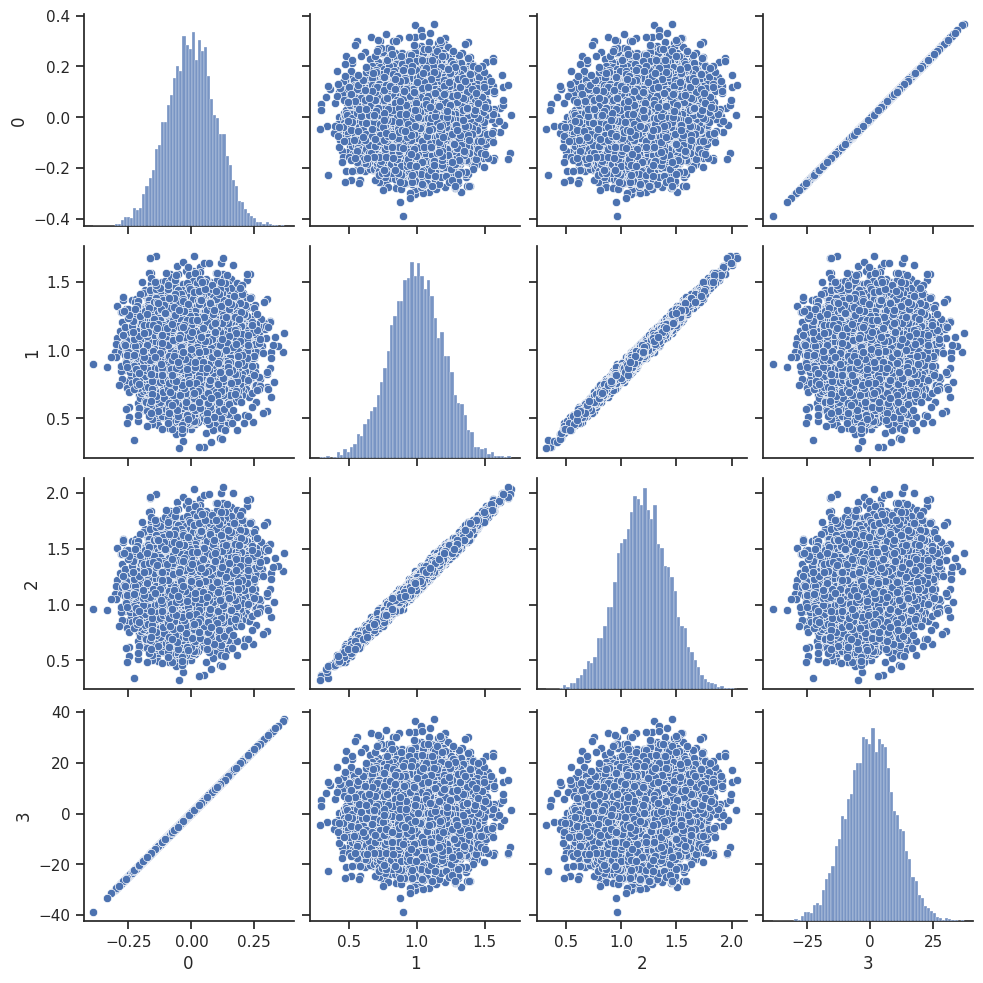

In [55]:
from random import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import decomposition
from sklearn import datasets

plt.close()
# random vectors x1 and x2

mu1, sigma1 = 0, 0.1
mu2, sigma2 = 1, 0.2

x1 = np.random.normal(mu1, sigma1, 10000)
#plt.plot(x1)
#plt.show()
x2 = np.random.normal(mu2, sigma2, 10000)
# creation of x3 and x4
x3 = 0.3*x1+1.2*x2
x4 = 100*x1+0.4*x2

# data matrix
M=np.transpose([x1, x2, x3, x4]) #simply creats the matrix
data=pd.DataFrame(data=M) # and now it transforms it into a usefull data matrix
sns.pairplot(data)

# escalamos los datos:
datas = preprocessing.scale(data)

#scatter matrix
# PCA analysis
pca = decomposition.PCA(n_components=4)
pca.fit(datas)
data_proj = pca.transform(datas)

100*pca.explained_variance_ratio_

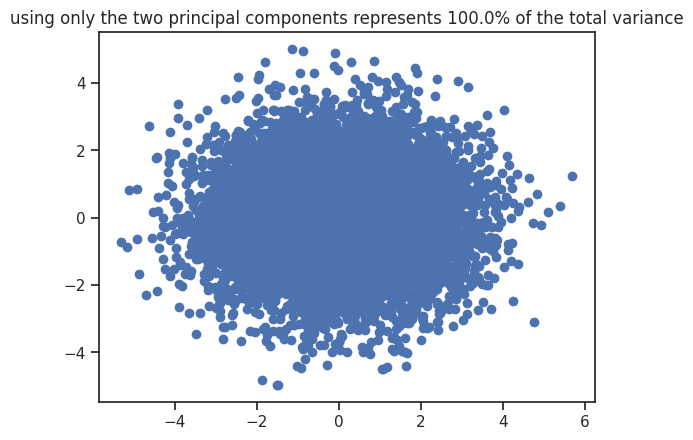

In [56]:
plt.figure()
t = pca.explained_variance_ratio_
plt.title(str("using only the two principal components represents "+str(1/100*int(10000*(t[0]+t[1])))+"% of the total variance"))
plt.scatter(data_proj[:,0], data_proj[:,1])
plt.show()

**EXERCICI**: Aplicar PCA a les dades dels pingüins de l'antàrtida (4 dimensionals). Quantes compnents PCA calen per explicar un 95% de la variabilitat de les dades. 

- Extensió: Aplicar k-means a les dades projectades a l'espai PCA de dimensionalitat reduïda. 


## 3.2 Visualització de dades d'alta dimensionalitat

Projecció a baixa dimensió de dades d'alta dimensió.



### Multidimensional Scaling (MDS) 

Aquesta tècnica projecta dades multidimensionals en un espai de dimensió inferior mantenint distàncies relatives entre observacions. El procediment aplica un esquema d'opitmització iteratiu per tal d'obtenir la funció de projecció òptima.

- L'escala multidimensional (MDS) projecta dades d'alta dimensionalitat a un espai de baixa dimensionalitat (normalment 2D o 3D) **mantenint distàncies relatives entre observacions**.

- Trobeu una transformació que satisfaci $d_{ij}^k \approx f(d_{ij}^M)$, on
$d_{ij}^M$ són distàncies parelles entre observacions $(i,j)$ a l'espai M-dimensional original i $d_{ij}^k$ són distàncies a l'espai k-dimensional baix ($k \ll M$).

- MDS troba la transformació $f$ minimitzant la funció objectiu:

\begin{equation*}
S^2(d_{ij}^k) = \frac{\sum_i \sum_j [f(d_{ij}^M)-d_{ij}^k]^2)]}{\sum_i \sum_j (d_{ij}^k)^2)} 
\end{equation*}

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


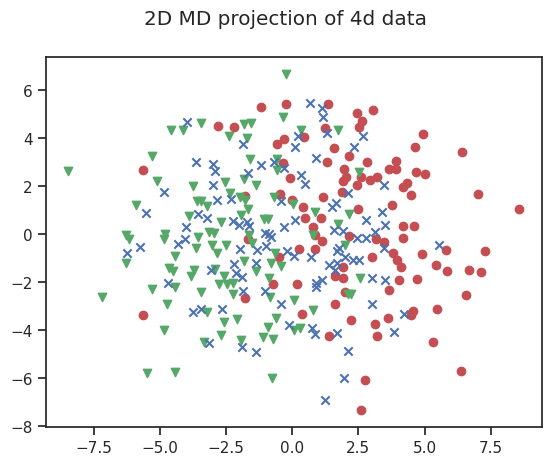

In [59]:
import numpy as np
import pylab as py

from sklearn import manifold
from sklearn.metrics import euclidean_distances

seed = np.random.RandomState(seed=3)

# Generate 4d random synthetic data (N variables x M observations):
N = 4
M = 300

M3 = int(round(M/3))
X1 = 1 + 2*np.random.randn(M3,N) # cluster 1 (medium dispersion)
X2 = -1 + 2*np.random.randn(M3,N) # cluster 2 (high dispersion)
X3 = 2*np.random.randn(M3,N) # cluster 3 (low dispersion)

A = np.concatenate((X1,X2,X3))

# Apply MDS algorithm:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
similarities = euclidean_distances(A)
pos = mds.fit(similarities).embedding_

# Represent data in the 2D MDS projection:
fig1 = py.figure()
for i in range(0,M3,1):
    py.scatter(pos[i][0],pos[i][1],marker='o',c='r')
for i in range(M3,2*M3,1):
    py.scatter(pos[i][0],pos[i][1],marker='v',c='g')
for i in range(2*M3,M,1):
    py.scatter(pos[i][0],pos[i][1],marker='x',c='b')
fig1.suptitle('2D MD projection of 4d data')
py.show()

### 1.3.2 t-distributed Stochastic Neighbor Embedding (t-SNE)

Una projecció no lineal de en un espai de dimensions baixes. El mapeig s'obté minimitzant la divergència Kullback-Leibler entre les probabilitats conjuntes de la projecció de dimensions baixes i les observacions d'alta dimensió.

Considerem un conjunt d'observacions d-dimensionals $\{\vec{x}_1, \vec{x}_2, \cdots, \vec{x}_N\}$.

Modelem la probabilitat condicional que $\vec{x}_j$ es prengui com a veí de $\vec{x}_i$ per una distribució normal centrada a $\vec{x}_i$:

$p_{j|i} = \frac{\exp\{-|\vec{x}_i-\vec{x}_j|^2/2\sigma^2_j\}}{\sum_{k\neq i } \exp\{-|\vec{x}_i-\vec{x}_j|^2/2\sigma^2_j\}}$

Això converteix les similituds entre els punts de dades en probabilitats conjuntes 

$p_{ij} = \frac{1}{2N}(p_{j|i}+p_{i|j})$

The low-dimensional map is then defined as a sequence of N points in a lower-dimension $\tilde{d}$ $\{\vec{y}_1, \vec{y}_2, \cdots, \vec{y}_N\}$. Let's define an equivalent joint probability at the low-dimensional space as

$q_{ij} = \frac{(1+|\vec{x}_i-\vec{x}_j|^2)^{-1}}{\sum_{k}\sum_{l\neq k}(1+|\vec{x}_k-\vec{x}_l|^2)^{-1}}$
 
 
The map is found by minimizing the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data

$KL(P|Q) = \sum_{i \neq j} p_{ij} log \frac{p_{ij}}{q_{ij}}$


In order to get familiar with the parameters and to get some insight about how to use this techinque please refer to 

https://distill.pub/2016/misread-tsne/

https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py





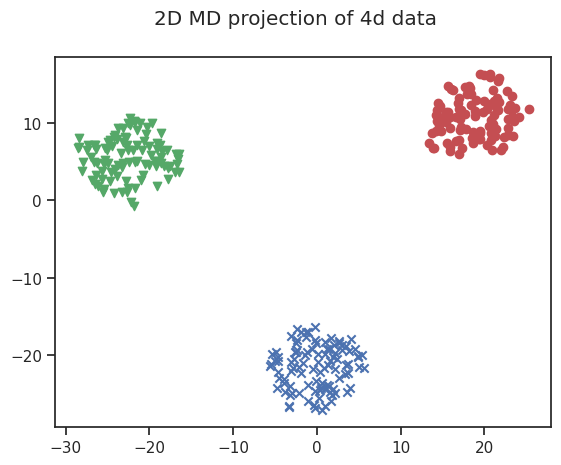

In [60]:
import numpy as np
import pylab as py

from sklearn import manifold
from sklearn.metrics import euclidean_distances

seed = np.random.RandomState(seed=3)

# Generate 4d random synthetic data (N variables x M observations):
N = 4
M = 300

M3 = int(round(M/3))
X1 = 10 + 2*np.random.randn(M3,N) # cluster 1 (medium dispersion)
X2 = -10 + 5*np.random.randn(M3,N) # cluster 2 (high dispersion)
X3 = 1*np.random.randn(M3,N) # cluster 3 (low dispersion)

A = np.concatenate((X1,X2,X3))

# Apply t-SNE algorithm:
n_components = 2
perplexity = 30
tsne = manifold.TSNE(n_components=n_components, init='random', random_state=0, perplexity=perplexity)
pos = tsne.fit_transform(A)

# Represent data in the 2D MDS projection:
fig1 = py.figure()
for i in range(0,M3,1):
    py.scatter(pos[i][0],pos[i][1],marker='o',c='r')
for i in range(M3,2*M3,1):
    py.scatter(pos[i][0],pos[i][1],marker='v',c='g')
for i in range(2*M3,M,1):
    py.scatter(pos[i][0],pos[i][1],marker='x',c='b')
fig1.suptitle('2D MD projection of 4d data')
py.show()

**Exercici** 

Generar dades 10 dimensionals en forma de tres blobs amb diferents dispersions i comparar la projecció 2d fent servir MDS i t-SNE


funció make_blobs sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

**Solució**

In [ ]:
from sklearn.datasets import make_blobs

# Generate random blobs:
n_features = 2
n_samples = 150
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers = [(0,0,0,0,0,0,0,0,0,0),(-10,10,0,0,0,0,0,0,0,0),(10,10,0,0,0,0,0,0,0,0)],cluster_std=(0.5,2,10))
X.shape

(150, 10)

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


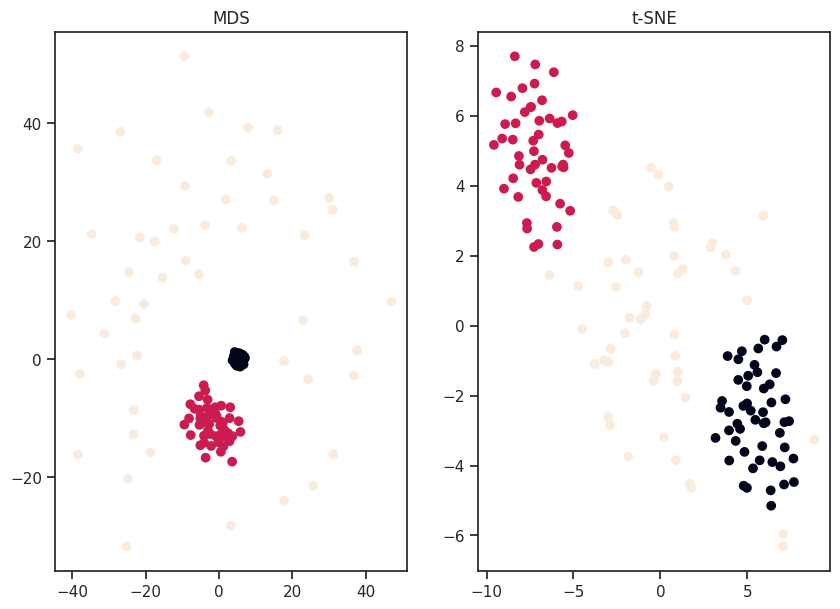

In [ ]:
# Apply MDS algorithm:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
similarities = euclidean_distances(X)
pos_mds = mds.fit(similarities).embedding_

# Apply t-SNE algorithm:
n_components = 2
perplexity = 30
tsne = manifold.TSNE(n_components=n_components, init='random', random_state=0, perplexity=perplexity)
pos_tsne = tsne.fit_transform(X)

# Plot everything:
plt.figure(figsize=(10,7))
ax0 = plt.subplot(1,2,1)
plt.scatter(pos_mds[:, 0], pos_mds[:, 1], c=y)
plt.title("MDS")
ax1 = plt.subplot(1,2,2)
plt.scatter(pos_tsne[:, 0], pos_tsne[:, 1], c=y)
plt.title("t-SNE")
plt.show()

# 3.3 Tècniques de selecció d'atributs:

https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

## Correlation heatmap:

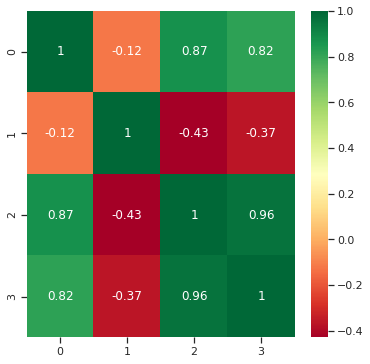

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

data = pd.DataFrame(X)
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## K best feature selector:

Select features according to the k highest scores of a certain test: In this example, the method computes chi-squared stats between each non-negative feature and class.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.


Other methods available as a performance scores:
- f_classif
ANOVA F-value between label/feature for classification tasks.

- mutual_info_classif
Mutual information for a discrete target.

- chi2
Chi-squared stats of non-negative features for classification tasks.

- f_regression
F-value between label/feature for regression tasks.

- mutual_info_regression
Mutual information for a continuous target.

- SelectPercentile
Select features based on percentile of the highest scores.

- SelectFpr
Select features based on a false positive rate test.

- SelectFdr
Select features based on an estimated false discovery rate.

- SelectFwe
Select features based on family-wise error rate.

- GenericUnivariateSelect
Univariate feature selector with configurable mode.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=1).fit_transform(X, y)
X_new.shape

(150, 1)

In [ ]:
sel = SelectKBest(chi2, k=1).fit(X, y)

In [ ]:
sel.scores_

array([ 10.818,   3.711, 116.313,  67.048])

## Recursive Feature Elimination: 

Given a set of training features and a classifier, the method recursively evaluates the performance of the method when removing some features and finally provides a reduced set of features that provide minimum loss of performance:

Data shape: (1797, 64)
Mantained features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


<Figure size 720x720 with 0 Axes>

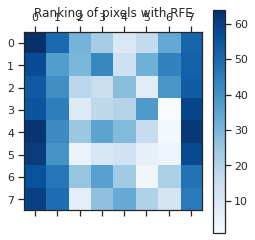

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
# The database contains 1797 Images of size 8x8 pixels
# Each of the 64 pixels is a feature
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target
print('Data shape: {}'.format(X.shape))

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1) 
# clf = tree.DecisionTreeClassifier()
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
print('Mantained features: {}'.format(rfe.support_))

# Relevance of each of the pixels represented as a 8x8 image:
# darker pixels at the borders can be discarded since do not improve the classifier's performance during training
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking (the lower, the more relevant the feature)
fig = plt.figure(figsize=(10,10))
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()